## Trazendo a tabela para a análise

In [20]:
# importando  a biblioteca pandas
import pandas as pd

# lê os dados do pandas  do dataset 
tabela = pd.read_csv('Consumo_cerveja.csv')

display(tabela)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Mostrando as colunas

In [21]:
print(tabela.columns)

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')


## Buscando informações da tabela

In [22]:
display(tabela.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


None

## Vendo o consumo durante o final de semana 

In [23]:
display(tabela['Final de Semana'].value_counts())

# porcentagem 
display(tabela['Final de Semana'].value_counts(normalize=True).map('{:.2%}'.format))

Final de Semana
0.0    261
1.0    104
Name: count, dtype: int64

Final de Semana
0.0    71.51%
1.0    28.49%
Name: proportion, dtype: object

## Consumo em litros

In [24]:
display(tabela['Consumo de cerveja (litros)'].value_counts())

Consumo de cerveja (litros)
24.862    3
22.933    2
24.227    2
25.343    2
26.594    2
         ..
29.265    1
35.127    1
29.130    1
25.795    1
21.062    1
Name: count, Length: 359, dtype: int64

In [25]:
for col in tabela.columns:
    print(f"'{col}'")

'Data'
'Temperatura Media (C)'
'Temperatura Minima (C)'
'Temperatura Maxima (C)'
'Precipitacao (mm)'
'Final de Semana'
'Consumo de cerveja (litros)'


## Fazendo análise com graficos.

         Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27,3                   23,9   
1  2015-01-02                 27,02                   24,5   
2  2015-01-03                 24,82                   22,4   
3  2015-01-04                 23,98                   21,5   
4  2015-01-05                 23,82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32,5                 0              0.0   
1                   33,5                 0              0.0   
2                   29,9                 0              1.0   
3                   28,6               1,2              1.0   
4                   28,3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

C:\Users\Aluno Manhã\AppData\Local\Temp\ipykernel_5556\185742276.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tabela.fillna(method='ffill', inplace=True)


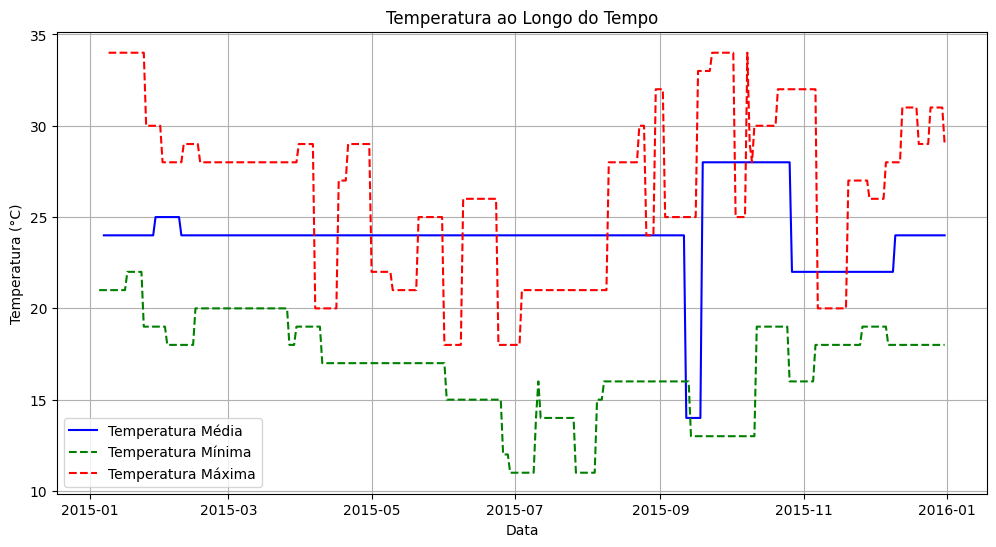

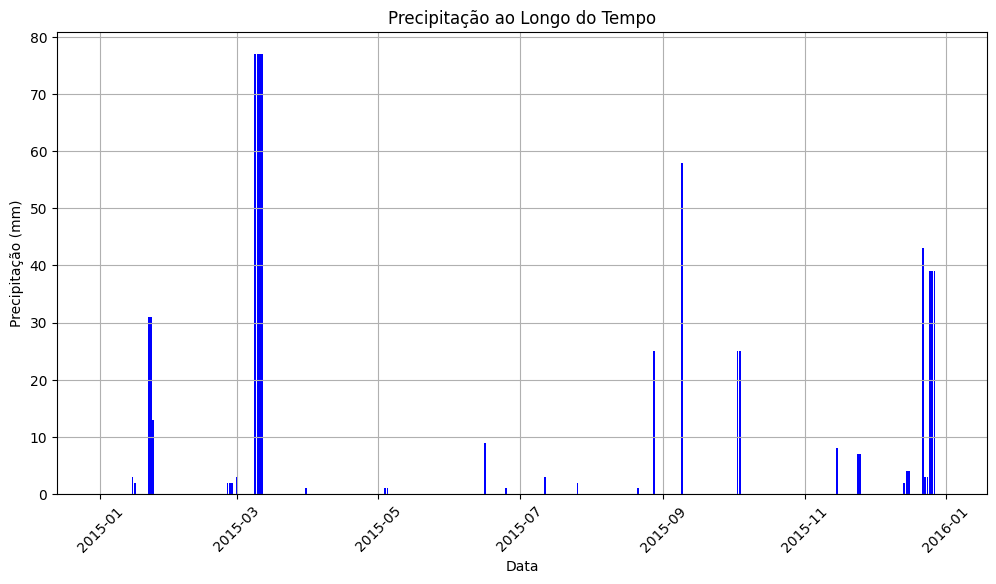

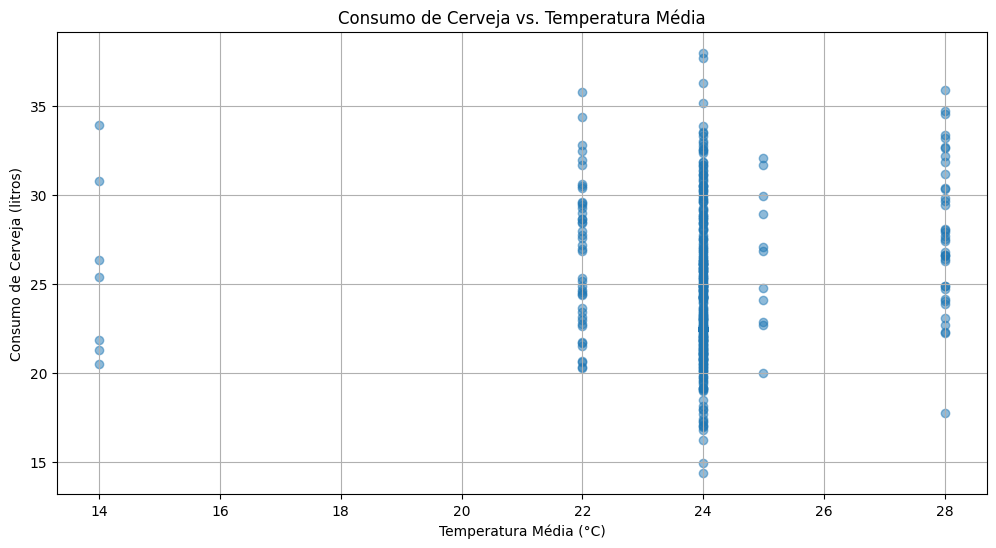

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o DataFrame a partir do arquivo CSV
tabela = pd.read_csv('Consumo_cerveja.csv')

# Exibir as primeiras linhas do DataFrame
print(tabela.head())

# Exibir informações gerais sobre o DataFrame
print(tabela.info())

# Converter a coluna 'Data' para datetime
tabela['Data'] = pd.to_datetime(tabela['Data'], errors='coerce')

# Converter colunas de temperatura e precipitação para numéricas
tabela['Temperatura Media (C)'] = pd.to_numeric(tabela['Temperatura Media (C)'], errors='coerce')
tabela['Temperatura Minima (C)'] = pd.to_numeric(tabela['Temperatura Minima (C)'], errors='coerce')
tabela['Temperatura Maxima (C)'] = pd.to_numeric(tabela['Temperatura Maxima (C)'], errors='coerce')
tabela['Precipitacao (mm)'] = pd.to_numeric(tabela['Precipitacao (mm)'], errors='coerce')

# Tratar valores faltantes (exemplo: preencher com o valor anterior)
tabela.fillna(method='ffill', inplace=True)

# Gráfico de Linhas da Temperatura ao Longo do Tempo
plt.figure(figsize=(12, 6))
plt.plot(tabela['Data'], tabela['Temperatura Media (C)'], label='Temperatura Média', color='blue')
plt.plot(tabela['Data'], tabela['Temperatura Minima (C)'], label='Temperatura Mínima', color='green', linestyle='--')
plt.plot(tabela['Data'],tabela['Temperatura Maxima (C)'], label='Temperatura Máxima', color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de Barras da Precipitação
plt.figure(figsize=(12, 6))
plt.bar(tabela['Data'], tabela['Precipitacao (mm)'], color='blue')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.title('Precipitação ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gráfico de Dispersão do Consumo de Cerveja vs. Temperatura Média
plt.figure(figsize=(12, 6))
plt.scatter(tabela['Temperatura Media (C)'], tabela['Consumo de cerveja (litros)'], alpha=0.5)
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Consumo de Cerveja (litros)')
plt.title('Consumo de Cerveja vs. Temperatura Média')
plt.grid(True)
plt.show()
